<a href="https://colab.research.google.com/github/fwx5ax/Final-Project-DS3001/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project - GSS

1. What is in your data?

Our data is composed of GSS survey data and includes several variables relating to demographic, economic, social, and health-related information of the participants, as well as data on job satisfaction, political views, family dynamics, and more. The data includes both categorical (e.g., marital status, race, political views) and numerical (e.g., income, stress level) variables. For a more specific breakdown of our exact variables, see below:

1. Demographic Variables:
	•	marital: Marital status of the respondent (e.g., married, divorced, never married).
	•	divorce: Whether the respondent has experienced a divorce.
	•	childsinhh: Whether the respondent has children living in the household.
	•	childs: Number of children the respondent has.
	•	hompop_exp: Expected household population.
	•	rspgndr: Respondent’s gender.
	•	educ: Highest level of education attained by the respondent.
	•	degree: Type of degree held (e.g., high school, college).
	•	paeduc: Father's education level.
	•	maeduc: Mother's education level.
	•	wrkstat: Respondent's current work status (e.g., employed, unemployed, retired).
	•	race, raceacs1, raceacs2, raceacs3, raceacs16: Respondent's race or ethnicity and detailed race categories.
	•	sex: Gender of the respondent.
	•	sexornt: Sexual orientation of the respondent.
	•	age: age of the respondent
2. Economic Variables:
	•	sei: Socioeconomic index (measure of occupational status).
	•	realrinc, realinc: Real income or household income adjusted for inflation.
	•	rincome: Any income from occupation?
	•	class: Social class of the respondent.
3. Family and Household:
	•	babies, preteen, teens, adults: Number of individuals in various age groups within the household.
	•	partners: Number of sexual partners the respondent had in the past year.
4. Health-Related Variables:
	•	health: Respondent's self-reported health status.
	•	stress: Level of stress reported by the respondent.
	•	neisafe: Safety perceived in the neighborhood.
	•	physact: Physical activity levels.
	•	smokeday: Whether the respondent smokes daily.
5. Social and Political Views:
	•	polviews: Political views of the respondent (e.g., liberal, conservative).
	•	relig: Religious affiliation.
	•	pray: Frequency of prayer.
	•	attend: Frequency of religious service attendance.
	•	postlife: Beliefs regarding life after death.
	•	fear: Fears related to safety or societal issues.
	•	gunlaw: Opinion on gun laws.
	•	trust: Level of trust in government, people, etc.
6. Job and Work-Related Variables:
	•	joblose: Whether the respondent has lost a job.
	•	jobfind: Whether the respondent found a job after losing one.
	•	spwrksta: Work status of spouse/partner.
	•	cowrksta: Work status of coworkers.
	•	satjob: Job satisfaction (e.g., very satisfied, somewhat satisfied).
7. Well-being and Happiness:
	•	happy: Respondent's overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.
	•	satfin: Satisfaction with financial situation.
8. Safety and Security:
	•	vaxsafe: Perception of vaccine safety.
	•	covid12: Opinion or impact of COVID-19.
	•	evidu: Perception of educational or social issues.
	•	helpful: Perception of helpfulness in society or community.
	•	arrest: Whether the respondent has been arrested.
9. Other Variables:
	•	instype01: Type of health insurance.
	•	condom: Use of contraception, specifically condoms.
	•	jobfind: Whether the respondent was able to find a job after losing one.
10. Subjective Well-Being:
	•	happy: Overall happiness.
	•	hapmar: Happiness in marriage.
	•	hapcohab: Happiness in cohabitation.


2. How will these data be useful for studying the phenomenon you're interested in?

These variables from the GSS data allow our group to understand how social structures, personal well-being, cultural beliefs, and economic conditions interact with one another to shape the state of the world, particularly in the context of current global political and social dynamics, which is the phenomenon we are most interested in. By examining the relationships between various aspects of demographics, economic factors, and emotional well-being, our group is aiming to uncover how societal issues like job insecurity, income inequality, and family life impact overall happiness and stress levels. Furthermore, by examining variables related to political and religious views, our group wants to explore how these factors shape perceptions of trust, safety, and societal issues. We seek to understand how political polarization and the social divisions currently evident in our country may be reflected in this data. Overall, we want to examine the ways in which this data reflects broader social science concerns about inequality, societal well-being, and the evolving nature of family and work life. By analyzing these interactions, we can identify trends that inform better decision-making for policymakers and social scientists, as understanding how different factors influence well-being and societal outcomes allows for more targeted interventions and strategies that can promote a more equitable and less polarized society.

3. What are the challenges you've resolved or expect to face in using them?
Although the dataset appears relatively clean, there is always the issue of data completeness due to some variables being missing, inconsistent, or incomplete. Handling these missing values (NaNs), especially when they are spread across different columns, can require decisions about whether to impute values or just completely drop rows. Data standardization might also be necessary, as variables like political views/religious beliefs/income may be recorded in different formats or categories across time. Another challenge we are expecting to face is multicollinearity, where certain variables may be highly correlated with each other, which could lead to a lot of unnecessary overlap in our analysis and repetition of extracting trends from certain patterns. We could avoid this by dropping particular variables that represent the same thing. The last challenge we expect to face has to do with our interpretation of the interactions between certain variables as some of these relationships might be non-linear and complicated to visually understand what they are saying about the broader picture. As such, we should be very careful in how we read graphs and interpret the trends of the interactions between variables in order to most effectively understand how different factors interact.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
var_list = ['marital', 'divorce', 'childsinhh', 'childs','age', 'hompop_exp','rspgndr', 'rprnt18',
'educ', 'degree', 'paeduc', 'maeduc', 'wrkstat','hrs1', 'sei', 'realrinc', 'realinc', 'rincome',
'babies','preteen','teens','adults','race', 'raceacs1', 'raceacs2', 'raceacs3',
'raceacs16','racecen1', 'sex', 'sexornt','vaxsafe','covid12','happy','hapmar','hapcohab', 'satfin',
'health', 'stress', 'neisafe','physact', 'instype01', 'partners', 'condom', 'evidu',
 'smokeday', 'arrest', 'trust', 'helpful','joblose', 'jobfind', 'spwrksta', 'cowrksta', 'class',
'polviews', 'relig', 'pray', 'attend', 'postlife', 'fear','gunlaw', 'satjob'] # List of variables you want to save

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    if phase == 0:
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode


In [3]:
gss = pd.read_csv('selected_gss_data.csv')

<ipython-input-3-9e26a9569f66>:1: DtypeWarning: Columns (6,7,23,24,25,26,27,29,30,31,34,37,38,39,40,41,42,43,44,45,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gss = pd.read_csv('selected_gss_data.csv')


In [4]:
gss.head()

,marital,divorce,childsinhh,childs,age,hompop_exp,rspgndr,rprnt18,educ,degree,...,cowrksta,class,polviews,relig,pray,attend,postlife,fear,gunlaw,satjob
0,never married,NaN,NaN,0.0,23.0,NaN,NaN,NaN,16.0,bachelor's,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,70.0,NaN,NaN,NaN,10.0,less than high school,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,48.0,NaN,NaN,NaN,12.0,high school,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,27.0,NaN,NaN,NaN,17.0,bachelor's,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,61.0,NaN,NaN,NaN,12.0,high school,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [5]:
gss['degree'].unique()

array(["bachelor's", 'less than high school', 'high school', 'graduate',
       'associate/junior college', nan], dtype=object)

In [6]:
gss[['educ','paeduc','maeduc']].describe()

,educ,paeduc,maeduc
count,72127.000000,51529.000000,60605.000000
mean,13.034633,10.905296,11.034024
std,3.182372,4.330440,3.763997
min,0.000000,0.000000,0.000000
25%,12.000000,8.000000,8.000000
50%,12.000000,12.000000,12.000000
75%,16.000000,13.000000,12.000000
max,20.000000,20.000000,20.000000


In [7]:
gss[['realrinc','realinc','sei']].describe()

,realrinc,realinc,sei
count,42333.000000,64912.000000,31277.000000
mean,23064.143938,32537.399981,48.423570
std,29175.569814,30883.226094,19.183154
min,218.000000,218.000000,17.100000
25%,8308.000000,12080.625000,32.400000
50%,16604.500000,24139.000000,39.000000
75%,28156.500000,40756.500000,63.500000
max,480144.472857,162607.000000,97.200000


In [8]:
print(gss['rincome'].unique())
print(gss['class'].unique())
gss = gss.drop(columns='rincome')
# we do not need another measure of occupation income - total income will be fine

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999']
['middle class' 'working class' 'upper class' 'lower class' nan 'no class']


In [9]:
gss[['babies','preteen','teens','adults','childs','childsinhh']].describe()

,babies,preteen,teens,adults,childs,childsinhh
count,66210.000000,66181.000000,66269.000000,68289.000000,72129.000000,1768.000000
mean,0.223954,0.275094,0.211698,1.913690,1.916538,0.464932
std,0.564219,0.652489,0.553078,0.812289,1.759511,0.982537
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
max,6.000000,8.000000,8.000000,9.000000,8.000000,8.000000


In [10]:
print(gss['hompop_exp'].describe())
# total # of people in household
gss = gss.drop(columns='hompop_exp')

print(gss['rspgndr'].unique())
# how the home/childcare labor is divided by gender

print(gss['rprnt18'].unique())
# are u the parent of another child 18 or older in your household?
gss = gss.drop(columns='rprnt18')

count    3538.000000
mean        1.678067
std         1.269275
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: hompop_exp, dtype: float64
[nan 'women and men take equal responsibility'
 'men take much more responsibility'
 'men take somewhat more responsibility'
 'women take somewhat more responsibility'
 'women take much more responsibility']
[nan 'yes' 'no']


In [11]:
print(gss['racecen1'].unique())
print(gss['race'].unique())

[nan 'white' 'black or african american' 'hispanic' 'other asian' 'samoan'
 'filipino' 'american indian or alaska native' 'other pacific islander'
 'chinese' 'some other race' 'vietnamese' 'asian indian' 'japanese'
 'korean' 'native hawaiian' 'guamanian or chamorro']
['white' 'black' 'other' nan]


In [12]:
gss = gss.drop(columns=['raceacs1', 'raceacs2', 'raceacs3','raceacs16'])
# these race dummy variables are not needed and can be created by us if we want them

In [13]:
print(gss['sex'].unique())
print(gss['sexornt'].unique())

['female' 'male' nan]
[nan 'heterosexual or straight' 'gay, lesbian, or homosexual' 'bisexual']


In [14]:
print(gss['divorce'].unique())
print(gss['marital'].unique())
print(gss['hapmar'].unique())
print(gss['hapcohab'].unique())
print(gss['partners'].describe())

[nan 'no' 'yes']
['never married' 'married' 'divorced' 'widowed' 'separated' nan]
[nan 'very happy' 'pretty happy' 'not too happy']
[nan 'very happy' 'pretty happy' 'not too happy']
count         37672
unique           10
top       1 partner
freq          24059
Name: partners, dtype: object


In [15]:
print(gss['happy'].unique())
print(gss['satfin'].unique())
print(gss['health'].unique())
print(gss['stress'].unique())
print(gss['physact'].unique())

['not too happy' 'pretty happy' 'very happy' nan]
['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan]
['good' 'fair' 'excellent' 'poor' nan]
[nan 'sometimes' 'often' 'hardly ever' 'never' 'always']
[nan 'once a month or less often' 'several times a month'
 'several times a week' 'daily' 'never']


In [16]:
print(gss['wrkstat'].unique())
print(gss['joblose'].unique())
print(gss['jobfind'].unique())
print(gss['spwrksta'].unique())
print(gss['cowrksta'].unique())
print(gss['satjob'].unique())
print(gss['hrs1'].describe())

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'other' nan]
[nan 'not likely' 'not too likely' 'very likely' 'fairly likely'
 'leaving labor force']
[nan 'not easy' 'very easy' 'somewhat easy']
[nan 'keeping house' 'working full time'
 'with a job, but not at work because of temporary illness, vacation, strike'
 'working part time' 'retired' 'unemployed, laid off, looking for work'
 'in school' 'other']
[nan 'working full time' 'keeping house' 'retired'
 'unemployed, laid off, looking for work' 'in school' 'working part time'
 'other'
 'with a job, but not at work because of temporary illness, vacation, strike']
['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied']
count    41560.000000
mean        41.183951
std         14.125299
min          0.000000
25%         37.000000
50%         40.000000
75% 

In [17]:
print(gss['evidu'].describe())
print(gss['smokeday'].describe())
print(gss['arrest'].describe())

count     23790
unique        2
top          no
freq      23077
Name: evidu, dtype: object
count                           1128
unique                             7
top       do not smoke and never did
freq                             665
Name: smokeday, dtype: object
count     12342
unique        3
top          no
freq      10781
Name: arrest, dtype: object


In [18]:
print(gss['vaxsafe'].describe())
print(gss['covid12'].describe())
print(gss['instype01'].describe())
print(gss['condom'].describe())

count      1232
unique        5
top       agree
freq        430
Name: vaxsafe, dtype: object
count     1226
unique       2
top        yes
freq       999
Name: covid12, dtype: object
count                         981
unique                          5
top       public health insurance
freq                          363
Name: instype01, dtype: object
count        27537
unique           2
top       not used
freq         21606
Name: condom, dtype: object


In [19]:
gss = gss.drop(columns=['helpful','trust'])
# not necessarily interesting

In [20]:
print(gss['pray'].describe())
print(gss['attend'].describe())
print(gss['relig'].describe())
print(gss['postlife'].describe())

count          43269
unique             6
top       once a day
freq           12083
Name: pray, dtype: object
count     71690
unique        9
top       never
freq      13855
Name: attend, dtype: object
count          71953
unique            13
top       protestant
freq           40125
Name: relig, dtype: object
count     44148
unique        2
top         yes
freq      35337
Name: postlife, dtype: object


In [21]:
print(gss['neisafe'].describe())
print(gss['fear'].describe())
print(gss['gunlaw'].describe())
print(gss['polviews'].describe())

count          6646
unique            4
top       very safe
freq           3464
Name: neisafe, dtype: object
count     45781
unique        2
top          no
freq      27793
Name: fear, dtype: object
count     48307
unique        2
top       favor
freq      36367
Name: gunlaw, dtype: object
count                            62718
unique                               7
top       moderate, middle of the road
freq                             23992
Name: polviews, dtype: object


In [22]:
# Rename columns in the GSS for clarity
gss = gss.rename(columns={
    'childsinhh': 'children_in_household',
    'childs': 'number_of_children',
    'rspgndr': 'gender_housework',
    'paeduc': 'father_educ',
    'maeduc': 'mother_educ',
    'wrkstat': 'work_status',
    'hrs1': 'hours_worked',
    'realrinc': 'real_income',
    'realinc': 'household_income',
    'race': 'race_ethnicity',
    'racecen1': 'race_detailed',
    'vaxsafe': 'vaccine_safety',
    'covid12': 'covid19_impact',
    'hapmar': 'marriage_happiness',
    'hapcohab': 'cohab_happiness',
    'satfin': 'financial_satis',
    'neisafe': 'neighborhood_safety',
    'instype01': 'health_insurance',
    'partners': 'number_partners',
    'evidu': 'inj_drugs',
    'spwrksta': 'spouse_work_status',
    'cowrksta': 'cohab_work_status',
    'postlife': 'beliefs_afterlife',
    'fear': 'area_fear',
    'satjob': 'job_satisfaction'
})


In [23]:
gss.head()

,marital,divorce,children_in_household,number_of_children,age,gender_housework,educ,degree,father_educ,mother_educ,...,cohab_work_status,class,polviews,relig,pray,attend,beliefs_afterlife,area_fear,gunlaw,job_satisfaction
0,never married,NaN,NaN,0.0,23.0,NaN,16.0,bachelor's,10.0,NaN,...,NaN,middle class,NaN,jewish,NaN,about once or twice a year,NaN,NaN,favor,a little dissatisfied
1,married,no,NaN,5.0,70.0,NaN,10.0,less than high school,8.0,8.0,...,NaN,middle class,NaN,catholic,NaN,every week,NaN,NaN,favor,NaN
2,married,no,NaN,4.0,48.0,NaN,12.0,high school,8.0,8.0,...,NaN,working class,NaN,protestant,NaN,about once a month,NaN,NaN,favor,moderately satisfied
3,married,no,NaN,0.0,27.0,NaN,17.0,bachelor's,16.0,12.0,...,NaN,middle class,NaN,other,NaN,never,NaN,NaN,favor,very satisfied
4,married,no,NaN,2.0,61.0,NaN,12.0,high school,8.0,8.0,...,NaN,working class,NaN,protestant,NaN,never,NaN,NaN,favor,NaN


In [24]:
numeric_columns = gss.select_dtypes(include=['number']).columns
print("Numeric columns:", numeric_columns)

Numeric columns: Index(['children_in_household', 'number_of_children', 'age', 'educ',
       'father_educ', 'mother_educ', 'hours_worked', 'sei', 'real_income',
       'household_income', 'babies', 'preteen', 'teens', 'adults'],
      dtype='object')


In [25]:
categorical_columns = gss.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['marital', 'divorce', 'gender_housework', 'degree', 'work_status',
       'race_ethnicity', 'race_detailed', 'sex', 'sexornt', 'vaccine_safety',
       'covid19_impact', 'happy', 'marriage_happiness', 'cohab_happiness',
       'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
       'health_insurance', 'number_partners', 'condom', 'inj_drugs',
       'smokeday', 'arrest', 'joblose', 'jobfind', 'spouse_work_status',
       'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
       'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'],
      dtype='object')


In [26]:
# 1. Impute numeric columns with the mean
numeric_columns = gss.select_dtypes(include=['number']).columns
for col in numeric_columns:
    gss[col] = gss[col].fillna(gss[col].mean())

# 2. Impute categorical columns with the string "missing"
categorical_columns = gss.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    gss[col] = gss[col].fillna('missing')


After exploring the variables, here is a final list of the variables in the dataset. We dropped some variables and renamed many for clarity.

'marital', 'divorce', 'children_in_household', 'number_of_children', 'gender', 'educ', 'age',
 'degree', 'father_educ', 'mother_educ', 'work_status', 'hours_worked', 'sei', 'real_income',
 'household_income', 'babies', 'preteen', 'teens', 'adults', 'race_ethnicity', 'race_detailed',
 'sex', 'sexornt', 'vaccine_safety', 'covid19_impact', 'happy', 'marriage_happiness',
 'cohab_happiness', 'financial_satis', 'health', 'stress', 'neighborhood_safety', 'physact',
 'health_insurance', 'number_partners', 'condom', 'inj_drugs', 'smokeday', 'arrest', 'joblose',
 'jobfind', 'spouse_work_status', 'cohab_work_status', 'class', 'polviews', 'relig', 'pray', 'attend',
 'beliefs_afterlife', 'area_fear', 'gunlaw', 'job_satisfaction'

# Visualizations

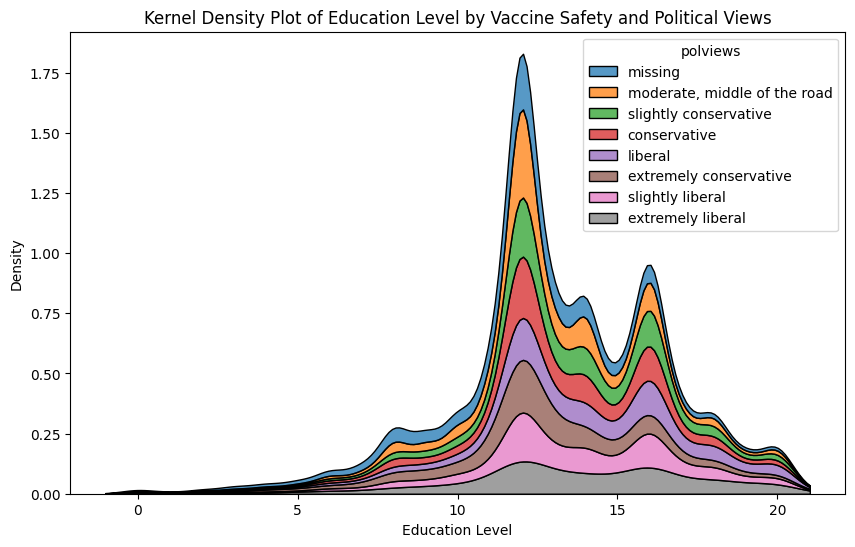

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'vaccine_safety' and 'beliefs_afterlife' and plotting the kernel density
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=gss, x="educ", hue="vaccine_safety", multiple="stack", common_norm=False)
sns.kdeplot(data=gss, x="educ", hue="polviews", multiple="stack", common_norm=False)

plt.title('Kernel Density Plot of Education Level by Vaccine Safety and Political Views')
plt.xlabel('Education Level')
plt.ylabel('Density')
plt.show()

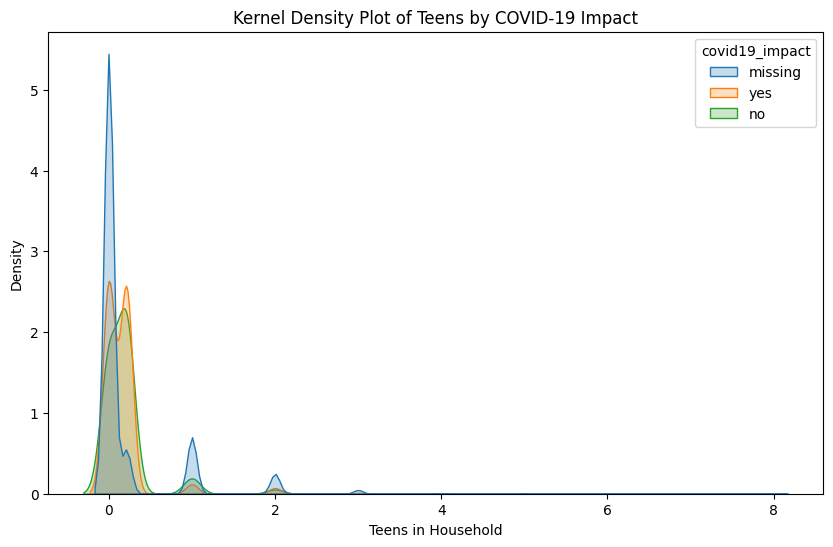

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gss, x='teens', hue='covid19_impact', common_norm=False, fill=True)
plt.title('Kernel Density Plot of Teens by COVID-19 Impact')
plt.xlabel('Teens in Household')
plt.ylabel('Density')
plt.show()

<ipython-input-29-88aae307d70b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income


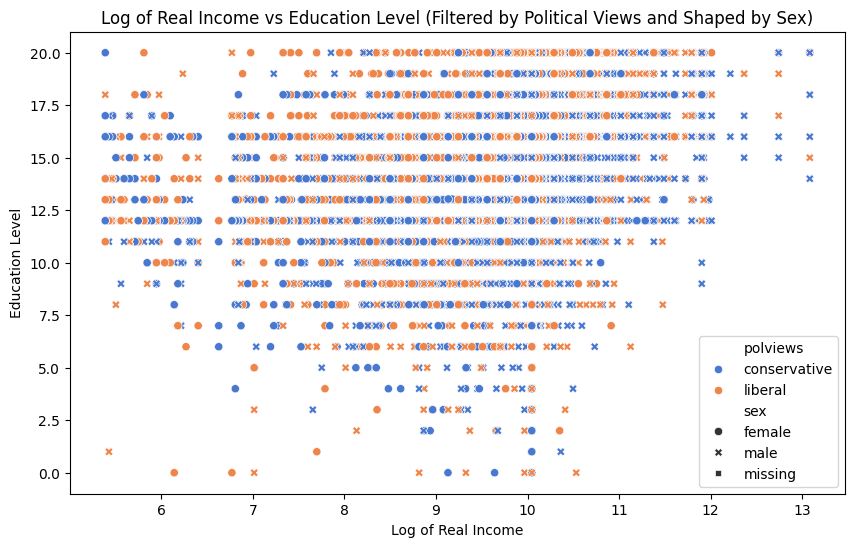

In [29]:
# Filter the dataset to include only the specified political views
gss_filtered = gss[gss['polviews'].isin(['liberal', 'conservative'])]

# Apply log transformation to 'real_income'
gss_filtered['log_real_income'] = np.log1p(gss_filtered['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gss_filtered, x='log_real_income', y='educ', hue='polviews', style='sex', palette='muted')
plt.title('Log of Real Income vs Education Level (Filtered by Political Views and Shaped by Sex)')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

<ipython-input-30-110240d5a3b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gss, x='health', y='stress', palette='pastel')


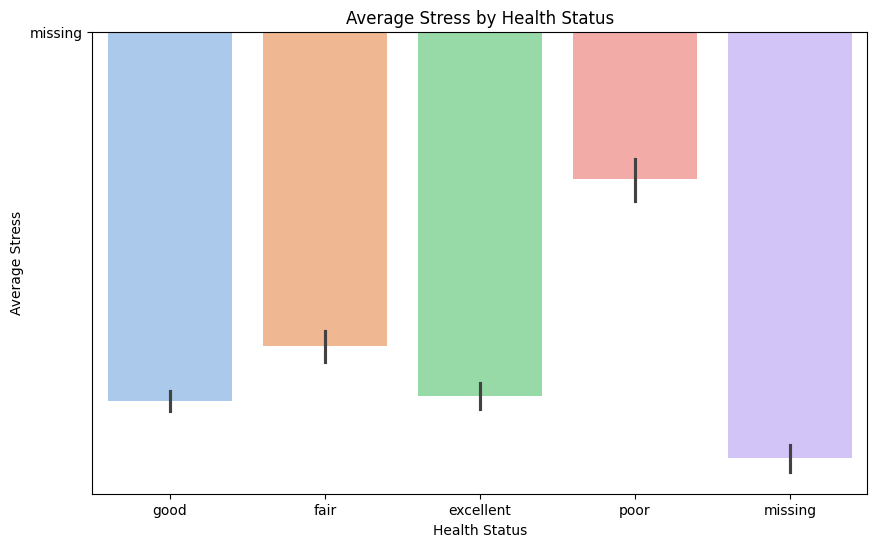

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gss, x='health', y='stress', palette='pastel')
plt.title('Average Stress by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Stress')
plt.show()

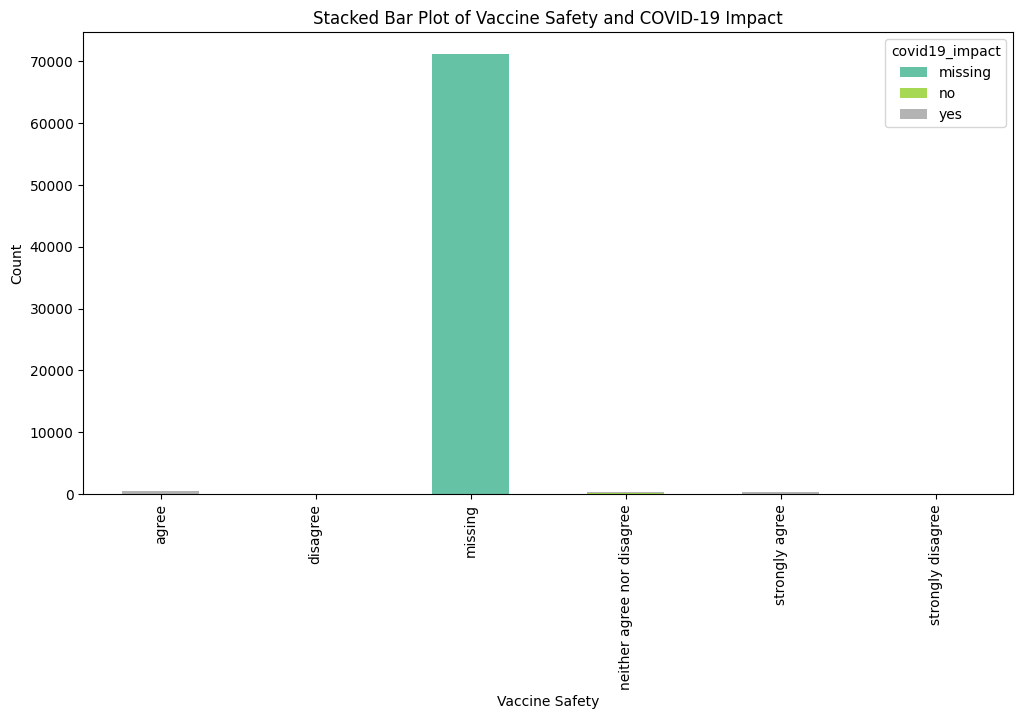

In [31]:
vaccine_impact = gss.groupby(['vaccine_safety', 'covid19_impact']).size().unstack().fillna(0)
vaccine_impact.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Bar Plot of Vaccine Safety and COVID-19 Impact')
plt.xlabel('Vaccine Safety')
plt.ylabel('Count')
plt.show()

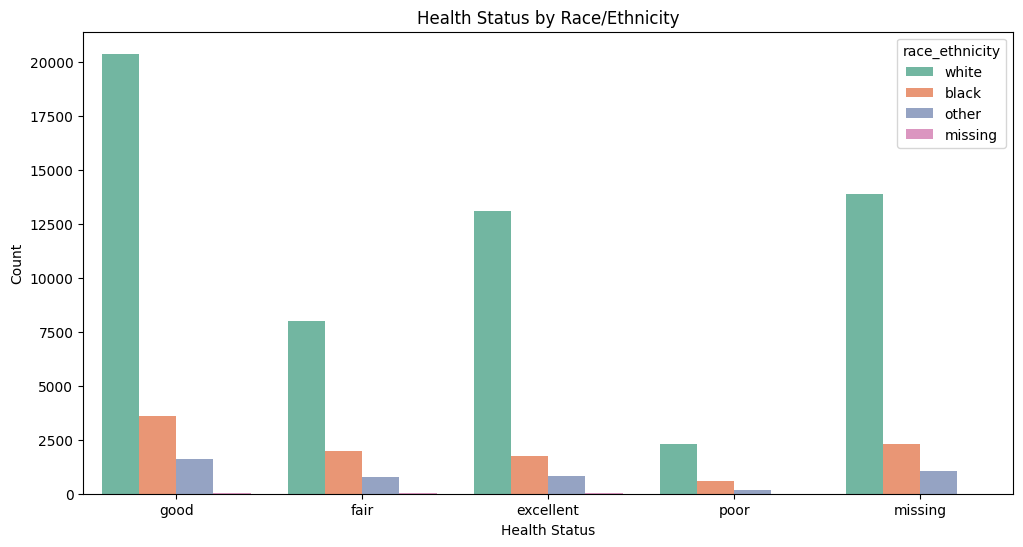

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=gss, x='health', hue='race_ethnicity', palette='Set2')
plt.title('Health Status by Race/Ethnicity')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


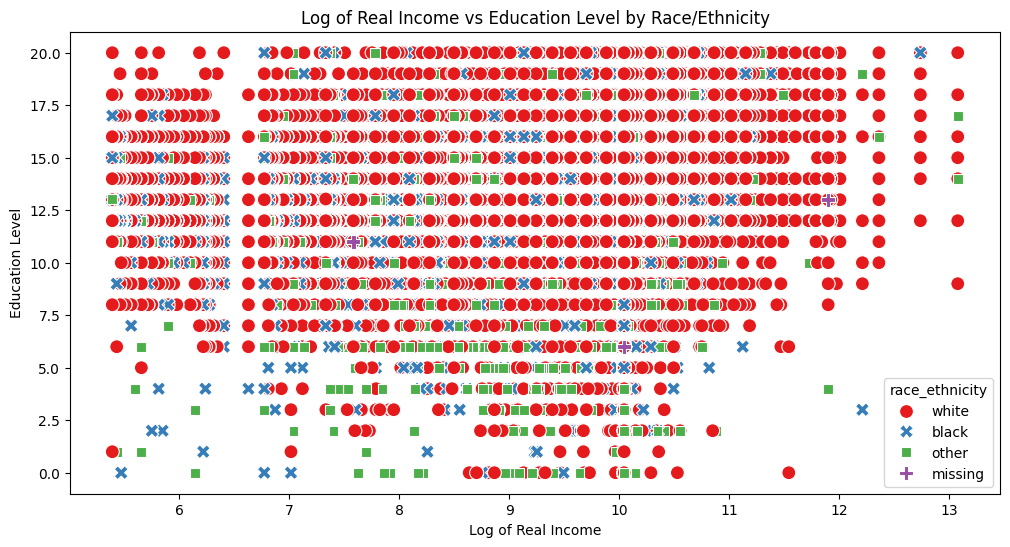

In [33]:
# Apply log transformation to 'real_income'
gss['log_real_income'] = np.log1p(gss['real_income'])  # Log-transform real income

# Create the scatter plot with the transformed variable and increased dot size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=gss, x='log_real_income', y='educ', hue='race_ethnicity', style='race_ethnicity',
                palette='Set1', s=100)  # 's' controls the size of the dots (default is 40)

plt.title('Log of Real Income vs Education Level by Race/Ethnicity')
plt.xlabel('Log of Real Income')
plt.ylabel('Education Level')
plt.show()

In [34]:
desc_stats = gss[['educ', 'real_income', 'household_income', 'polviews', 'happy', 'sex']].describe(include='all').transpose()
print("\nDescriptive Statistics Table:")
print(desc_stats)


Descriptive Statistics Table:
                    count unique                           top   freq  \
educ              72390.0    NaN                           NaN    NaN   
real_income       72390.0    NaN                           NaN    NaN   
household_income  72390.0    NaN                           NaN    NaN   
polviews            72390      8  moderate, middle of the road  23992   
happy               72390      4                  pretty happy  37813   
sex                 72390      3                        female  40301   

                          mean           std    min        25%           50%  \
educ                 13.034633      3.176586    0.0       12.0          12.0   
real_income       23064.143938  22310.918611  218.0    14170.0  23064.143938   
household_income  32537.399981  29244.588997  218.0  13501.875       27188.0   
polviews                   NaN           NaN    NaN        NaN           NaN   
happy                      NaN           NaN    NaN      

In [48]:
# 1. Income by Degree
income_by_degree = gss.groupby('degree')['real_income'].describe()
print("\nIncome by Degree:")
income_by_degree


Income by Degree:


,count,mean,std,min,25%,50%,75%,max
degree,,,,,,,,
associate/junior college,4355.0,22136.650595,19906.736141,218.0,13475.000000,23064.143938,23463.750000,480144.472857
bachelor's,11248.0,29216.742083,30440.882372,218.0,18476.250000,23064.143938,29925.000000,480144.472857
graduate,5953.0,39168.304989,43067.469347,218.0,23064.143938,23563.000000,42020.000000,480144.472857
high school,36446.0,20050.479071,15425.335368,218.0,12012.656250,23064.143938,23064.143938,480144.472857
less than high school,14192.0,19478.491731,10855.255406,218.0,15075.000000,23064.143938,23064.143938,480144.472857
missing,196.0,21484.269788,8778.900987,444.0,23064.143938,23064.143938,23064.143938,103206.000000


In [47]:
# 2. Happiness by Political Groups (cross tab)
gss['pol_group'] = gss['polviews'].map({
    'conservative': 'conservative',
    'extremely conservative': 'conservative',
    'slightly conservative': 'conservative',
    'moderate, middle of the road': 'moderate',
    'slightly liberal': 'liberal',
    'liberal': 'liberal',
    'extremely liberal': 'liberal'
})
happiness_by_polviews = pd.crosstab(gss['pol_group'], gss['happy'], normalize='index') * 100
print("\nHappiness by Political Views (percentages):")
happiness_by_polviews


Happiness by Political Views (percentages):


happy,missing,not too happy,pretty happy,very happy
pol_group,,,,
conservative,2.731749,12.082189,51.732790,33.453271
liberal,2.766417,14.343331,56.521245,26.369007
moderate,2.921807,13.321107,56.027009,27.730077


In [49]:
# 3. Political Views by Gender (cross tab)
polviews_by_gender = pd.crosstab(gss['sex'], gss['pol_group'], normalize='index') * 100
print("\nPolitical Views by Gender (percentages):")
polviews_by_gender


Political Views by Gender (percentages):


pol_group,conservative,liberal,moderate
sex,,,
female,31.231934,28.358770,40.409296
male,36.694138,27.721289,35.584573
missing,34.408602,24.731183,40.860215


In [52]:
# 4. Happiness by Sex
happiness_by_gender = pd.crosstab(gss['sex'], gss['happy'], normalize='index') * 100
print("\nHappiness by Gender (percentages):")
happiness_by_gender


Happiness by Gender (percentages):


happy,missing,not too happy,pretty happy,very happy
sex,,,,
female,6.672291,13.012084,51.834942,28.480683
male,6.604747,12.912406,52.694124,27.788723
missing,0.892857,15.178571,65.178571,18.750000


In [50]:
# 5. Political Views by Race
polviews_by_race = pd.crosstab(gss['race_ethnicity'], gss['pol_group'], normalize='index') * 100
print("\nPolitical Views by Race (percentages):")
polviews_by_race


Political Views by Race (percentages):


pol_group,conservative,liberal,moderate
race_ethnicity,,,
black,24.300597,34.858949,40.840454
missing,27.000000,29.000000,44.000000
other,27.258647,32.472896,40.268456
white,35.782156,26.571184,37.646660


In [51]:
# 5. Political Views by Education Group
gss['educ_group'] = pd.cut(gss['educ'], bins=[0, 11, 15, 20], labels=['High School or Less', 'Some College', 'Bachelor+'])
polviews_by_educ = pd.crosstab(gss['educ_group'], gss['polviews'], normalize='index') * 100
print("\nPolitical Views by Education Level (percentages):")
polviews_by_educ


Political Views by Education Level (percentages):


polviews,conservative,extremely conservative,extremely liberal,liberal,missing,"moderate, middle of the road",slightly conservative,slightly liberal
educ_group,,,,,,,,
High School or Less,11.005846,3.587986,2.768259,8.244306,21.238998,33.595377,10.374253,9.184976
Some College,13.038584,3.070310,2.279705,8.983216,12.475693,36.749053,13.294443,10.108996
Bachelor+,14.337389,2.334758,4.236545,15.740436,8.544338,25.128795,15.586978,14.090760


In [39]:
# 6. Happiness by Income Quartile
income_bins = pd.qcut(gss['real_income'], q=4, duplicates='drop')

# Get number of unique bins actually used
n_bins = income_bins.cat.categories.size

# Create matching labels dynamically
labels = ['Low', 'Medium', 'High', 'Very High'][:n_bins]

# Apply qcut again with correct number of labels
gss['income_group'] = pd.qcut(
    gss['real_income'],
    q=n_bins,
    labels=labels,
    duplicates='drop'
)

happiness_by_income = pd.crosstab(gss['income_group'], gss['happy'], normalize='index') * 100
print("\nHappiness by Income Level (percentages):")
print(happiness_by_income)



Happiness by Income Level (percentages):
happy          missing  not too happy  pretty happy  very happy
income_group                                                   
Low           6.530612      13.654917     54.594929   25.219542
Medium        6.534541      14.665351     49.968613   28.831495
High          7.029015       7.982564     53.500885   31.487536


RESULTS

The goal of our project is to understand the different demographic factors that influence health, happiness, and overall wellbeing to get an understanding of what makes a happy person in today's world. We plan to use logistic regression to determine what factors or traits are significant in predicting happiness. We generally hypothesize that high socioeconomic income, high job satisfaction and education, family formation, religiosity, healthly habits and excercise influence happiness. We also plan to build a classification model that predicts the level of happiness based on many relevant factors. Finally, we will use decision trees in a random forest algorithm to understand which "paths" are significant in predicting or resulting in a happy outcome.

Regressions

The following is a multivariate linear regression using many independent variables to predict real_income. We wanted to test whether happiness and health measures have an effect on income, controlling for many confounding demographic variables.

In [55]:
# lasso regression with real_income
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Select relevant features
vars = ['real_income', 'happy', 'marital', 'educ', 'sex', 'hours_worked', 'attend', 'age',
        'job_satisfaction', 'mother_educ', 'father_educ', 'degree', 'stress', 'physact',
        'work_status','sexornt','class','race_detailed']
gss_subset = gss[vars].copy()

# Drop rows with missing data
gss_subset = gss_subset.dropna()

# Define target and predictors
y = gss_subset['real_income']
X = pd.get_dummies(
    gss_subset.drop(columns='real_income'),
    columns=['happy', 'marital', 'sex', 'attend', 'job_satisfaction', 'stress', 'physact', 'sexornt','work_status','class','race_detailed','degree'],
    drop_first=True
)

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit Lasso regression pipeline
lasso = make_pipeline(StandardScaler(), Lasso(alpha=5.0))
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

# Extract trained model
model = lasso.named_steps['lasso']

# Print results
print("Intercept:", model.intercept_)
print("R^2 Score:", lasso.score(X, y))
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.2f}")
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")


Intercept: 23105.690134958706
R^2 Score: 0.18593086927537894
Test MSE: 357070353.53
Coefficients:
educ: 932.9922
hours_worked: 2810.0487
age: 2606.2669
mother_educ: 121.5490
father_educ: 290.8684
happy_not too happy: 1.6557
happy_pretty happy: 342.9206
happy_very happy: 508.8493
marital_married: 623.6549
marital_missing: -8.9026
marital_never married: -1149.9566
marital_separated: 57.5805
marital_widowed: 158.8113
sex_male: 3062.2599
sex_missing: 98.5037
attend_about once a month: 107.5172
attend_about once or twice a year: 11.1611
attend_every week: -185.4606
attend_less than once a year: 152.7243
attend_missing: 85.8461
attend_nearly every week: -108.3128
attend_never: -39.2146
attend_several times a week: -311.6281
attend_several times a year: 109.4812
job_satisfaction_missing: 531.6443
job_satisfaction_moderately satisfied: 263.0286
job_satisfaction_very dissatisfied: -69.9498
job_satisfaction_very satisfied: 845.4833
stress_hardly ever: -680.6843
stress_missing: -497.9129
stress_n

We used a lasso regression with an alpha value of 5.0 in order to narrow down the variables that actually have a significant relationship to income. The lasso method shrinks the coefficients of less important predictors closer to 0, penalizing and eliminating the effect of less-relevant factors. In this case, we played around with alpha and determined that a value of 0.5, which can be considered relativelt high, still showed that all included variables were meaningful in predicting real_income. Many variables had coefficients that supported our hypotheses. As happiness increases, so does real income. Surprisingly, more stress seems to be related to more income - with a caveat. Being stressed often results in about 530 dollars more in real_income than being stressed always; never being stressed is associated with about 426 dollars less in real_income than being stressed always. Perhaps there is an optimal level of stress - if you do not have enough to stress about it might mean that your life lacks purpose and motivations, but too much stress is crippling and unproductive. Engaging in physical activity several times a month had the highest positive coefficient at 150.0619. Overall, we also see an income premium for men, non racial minorities, heterosexual people, married people, and highly educated people. The R-squared value for this regression is 0.1859, indicating relatively low predictive power. However, we acknowledge that income is affected by many factors that are missing from the dataset and model like geographic region, industry, occupation, etc.


Logistic Regression

Next, we wanted to use a logistic regression model to predict happiness using a range of factors. We hypothesize that higher education, sei/class/income, hours_worked, and number of children is associated with higher levels of happiness. We also hypothesize that women, homosexual, and non-white people might experience lower levels of happiness and that married individuals are happier. We also think that moderate political views and moderate religiosity will be associated with higher levels of happiness than the extremes of those categories. Finally, we think that moderate physical activity and refraining from injection/illict drug use and smoking cigarettes will increase happiness levels. For this regression, we played around with how to code happy into a binary dependent variable using its four categories: "very happy","pretty happy", "not too happy", and "missing". The model with a high accuracy and AUC score was the model that coded "very happy" and "pretty happy" as 1 and "not too happy" and "missing" as 0. We hypothesize that most of the missing values might be missing in a patterned way - people who are very unhappy might have been overwhelmed by the question and elected not to answer it. To test this theory, we plotted the distribution of SEI (socioeconomic status) for the people who had missing values for the happy variable. After running these different models, the AUC of the model without missing included at all was 0.755 and the AUC of the model with missing coded as 1 was 0.754, causing us to decide on this method.

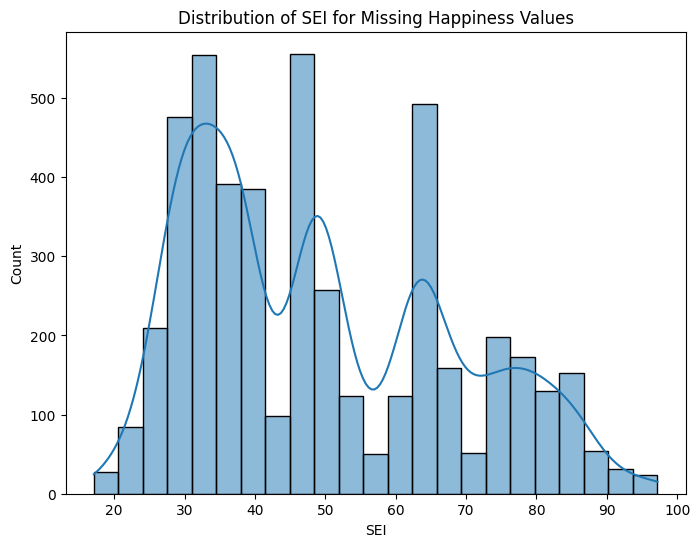

In [ ]:
# "missing" happiness is associated with lower SEI
if 'missing' in gss['happy'].unique():
  # Filter for 'happy' == 'missing'
  gss_missing_happy = gss[gss['happy'] == 'missing']

  # Distribution of 'sei' for those with 'happy' == 'missing'
  plt.figure(figsize=(8, 6))
  sns.histplot(gss_missing_happy['sei'], kde=True)
  plt.title('Distribution of SEI for Missing Happiness Values')
  plt.xlabel('SEI')
  plt.ylabel('Count')
  plt.show()
else:
  print("'missing' value not found in the 'happy' column.")


Logistic Regression Predicting Happiness

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8538472164663627
Confusion Matrix:
 [[ 1089  1717]
 [  399 11273]]
Intercept: [0.08351936]


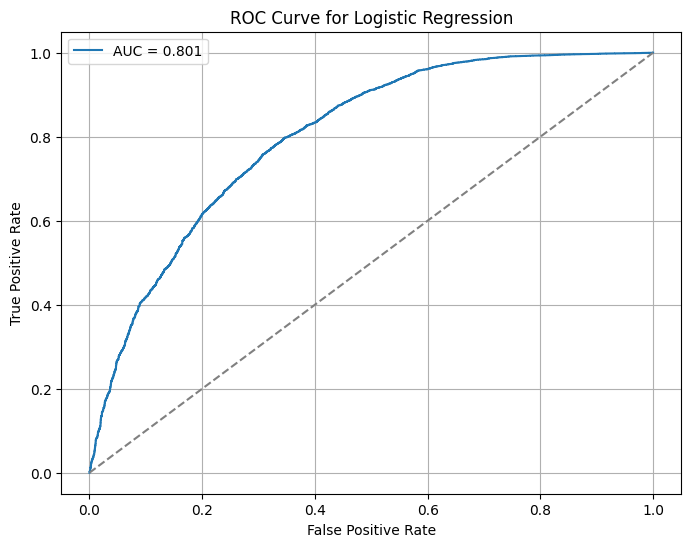

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Recode 'happy' to binary: 1 = happy, 0 = not too happy or missing
gss['happy_binary'] = gss['happy'].map({
    'very happy': 1,
    'pretty happy': 1,
    'not too happy': 0,
    'missing': 0
})

# Choose predictors
features = ['marital', 'educ', 'sex', 'hours_worked', 'attend','age','number_of_children','health','smokeday','polviews',
            'number_partners','inj_drugs','physact','stress','race_ethnicity','household_income',
            'sexornt','financial_satis','class','sei','neighborhood_safety']

# Subset data and drop missing
df = gss[['happy_binary'] + features].dropna()

# Define X and y
X = pd.get_dummies(df[features], drop_first=True)
y = df['happy_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Intercept:", log_reg.intercept_)

# Predict probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()


# Get feature names (X_test must be a DataFrame)
feature_names = X_test.columns

# Get coefficients from the trained logistic regression model
coefficients = log_reg.coef_[0]



This plot depicts the ROC curve that shows the true positive rate (sensitivity) against the false positive rate (1 - specificity) at different threshold settings. AUC is the area under the curve, which is a performance metric used to evaluate the ability of a classification model to distinguish between classes. An AUC of 0.5 suggests that a model is similar to a random guessing model, and an AUC of 1.0 shows perfect model classification abilities. In this case, an AUC of 0.801 is relatively high and shows that our model is good at predicting/classifying happiness outcomes based on the feature variables.

In [ ]:
# Large List of Coefficient Values in a Dataframe
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the result
coef_df


,Variable,Coefficient
70,financial_satis_pretty well satisfied,2.013692
68,financial_satis_more or less satisfied,1.453623
36,polviews_missing,-1.139995
72,class_missing,-0.836715
50,inj_drugs_no,-0.671017
...,...,...
43,number_partners_21-100 partners,-0.000754
57,stress_hardly ever,-0.000729
28,smokeday_smoke 1-5 cigarettes per day,0.000391
73,class_no class,0.000285


Classification

For our next model, we aimed to used KNeighbors Classification to predict a happiness outcome based on a few select features in the dataset. We again had to determine how to code the happiness variable: we could use happy_binary or the full happy variable. When using the happy variable, we saw an accuracy of 0.4745, compared to the 0.777 accuracy when using the happy_binary variable. These results confirm our hypothesis that the missing values might be more often coming from people who are very unhappy. Also, the people who selected "pretty happy" are probably closer to the "very happy" category than the "not too happy category" due to what we know about response bias for questions about stigmatized or uncomfortable topics. For our independent predictor variables we chose some of the more general variables in our dataset that reflect our overall hypothesis that happiness depends on work satisfaction/productivity, belief systems, family and marriage formation, health habits and stress levels, and demographic factors like gender and race.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Select features and target
features = ['household_income', 'work_status', 'educ', 'marital', 'sex', 'race_ethnicity','health','stress',
            'attend','physact','number_of_children','hours_worked']
gss_subset = gss[features + ['happy_binary']].dropna()

# 2. Encode categorical variables
X = pd.get_dummies(gss_subset.drop(columns='happy_binary'), drop_first=True)
y = gss_subset['happy_binary']  # Categorical target

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 6. Evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7772482387070038
[[  385  2421]
 [  804 10868]]
              precision    recall  f1-score   support

           0       0.32      0.14      0.19      2806
           1       0.82      0.93      0.87     11672

    accuracy                           0.78     14478
   macro avg       0.57      0.53      0.53     14478
weighted avg       0.72      0.78      0.74     14478



Next, we did another classification using stress as the outcome variable. We intentionally excluded variables related to work, income, class, sei, and education to determine if stress levels can be explained by factors other than financial wellbeing. We also recoded the stress variable into fewer variables for clarity. This model had an accuracy score of 0.625.

In [ ]:
# 1. Select features and target
features = [ 'marital', 'sex', 'race_ethnicity','health', 'job_satisfaction',
            'attend','physact','number_of_children','inj_drugs','smokeday','polviews']

# 2. Recode stress variable
gss['stress_new'] = gss['stress'].map({
    'always': 'always',
    'often': 'moderately',
    'sometimes': 'moderately',
    'hardly ever': 'rarely',
    'never': 'rarely'
})


gss_subset = gss[features + ['stress_new']].dropna()

# 3. Encode categorical variables
X = pd.get_dummies(gss_subset.drop(columns='stress_new'), drop_first=True)
y = gss_subset['stress_new']  # Categorical target

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 7. Evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.625
[[  31  270   19]
 [  93 1887  154]
 [  45  610   67]]
              precision    recall  f1-score   support

      always       0.18      0.10      0.13       320
  moderately       0.68      0.88      0.77      2134
      rarely       0.28      0.09      0.14       722

    accuracy                           0.62      3176
   macro avg       0.38      0.36      0.35      3176
weighted avg       0.54      0.62      0.56      3176



Tree/Random Forest

Finally, we decided to use a decision tree/random forest algorithm to make predictions using the happy variable. We used the happy_binary variable again due to the clarity of the results and the hypothesis about the missing values. First, we used the same variables as previously used for our classification with happy_binary. The accuracy for this new model was 0.79, higher than the classification accuracy of 0.77. Since we saw that this model is relatively better at predicting happiness, we decided to use it while adding more relevant variables that we wanted to explore. This model has an accuracy of 0.86, making it our best-performing model of the analysis.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# 1. Select features and target
features = ['household_income', 'job_satisfaction', 'educ', 'age', 'marital', 'sex', 'race_ethnicity','health','stress',
            'relig','physact','number_of_children','class','polviews','work_status','smokeday','gunlaw','sei','sexornt','area_fear']
gss_subset = gss[features + ['happy_binary']].dropna()

# 2. Encode categorical variables
X = pd.get_dummies(gss_subset.drop(columns='happy_binary'), drop_first=True)
y = gss_subset['happy_binary']  # Categorical target

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8643459041304048
[[  995  1811]
 [  153 11519]]
              precision    recall  f1-score   support

           0       0.87      0.35      0.50      2806
           1       0.86      0.99      0.92     11672

    accuracy                           0.86     14478
   macro avg       0.87      0.67      0.71     14478
weighted avg       0.86      0.86      0.84     14478

